In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
train_data=pd.read_csv("데이콘_신용데이터/train.csv")
test_data=pd.read_csv('데이콘_신용데이터/test.csv')

In [4]:
train_data.head()

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A
3,TRAIN_00003,14400000,36 months,8 years,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C
4,TRAIN_00004,18000000,60 months,Unknown,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B


In [5]:
null_count=train_data.isnull().sum()
null_count

ID              0
대출금액            0
대출기간            0
근로기간            0
주택소유상태          0
연간소득            0
부채_대비_소득_비율     0
총계좌수            0
대출목적            0
최근_2년간_연체_횟수    0
총상환원금           0
총상환이자           0
총연체금액           0
연체계좌수           0
대출등급            0
dtype: int64

# 범주형 데이터들의 범주 확인

In [6]:
category_house = train_data['주택소유상태'].value_counts()
print(category_house)
category_jobspend = train_data['근로기간'].value_counts()
print(category_jobspend)
category_loan_purpose = train_data['대출목적'].value_counts()
print(category_loan_purpose)

주택소유상태
MORTGAGE    47934
RENT        37705
OWN         10654
ANY             1
Name: count, dtype: int64
근로기간
10+ years    31585
2 years       8450
< 1 year      7774
3 years       7581
1 year        6249
Unknown       5671
5 years       5665
4 years       5588
8 years       4888
6 years       3874
7 years       3814
9 years       3744
10+years       896
<1 year        370
3               89
1 years         56
Name: count, dtype: int64
대출목적
부채 통합     55150
신용 카드     24500
주택 개선      6160
기타         4725
주요 구매      1803
의료         1039
자동차         797
소규모 사업      787
이사          506
휴가          466
주택          301
재생 에너지       60
Name: count, dtype: int64


### 주택소유상태 열의 값이 ANY인 값이 1개 뿐이므로 범주를 줄이기 위해 행 삭제

In [7]:
condition=(train_data['주택소유상태']=='ANY')
train_data=train_data.drop(train_data[condition].index)

## 범주가 꽤 많아서 한 눈에 잘 들어오지 않는다.

## 이에 범주들의 비율을 PIE차트로 시각화


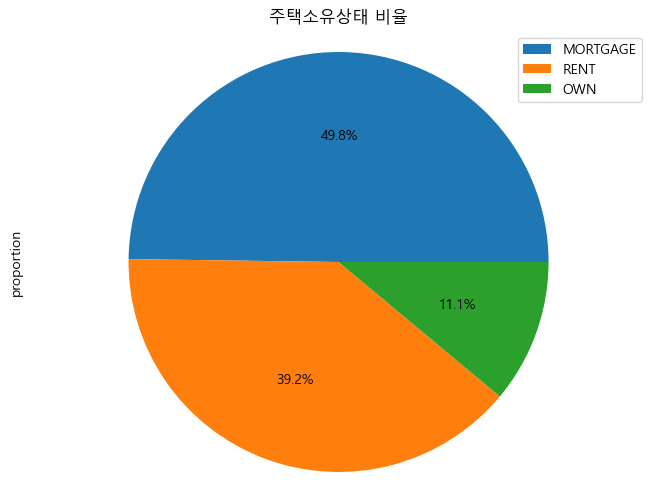

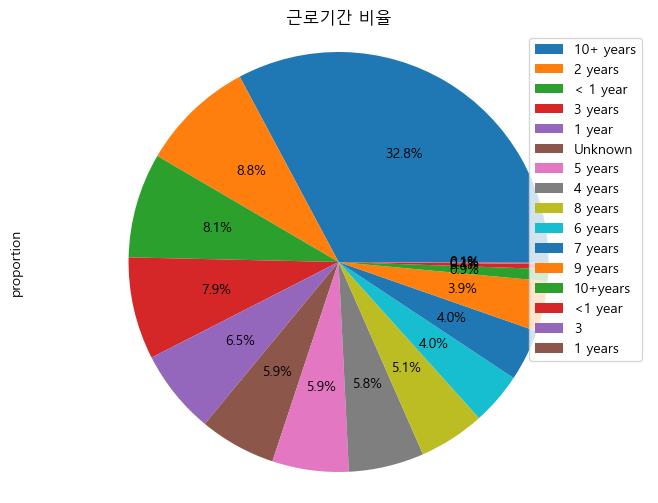

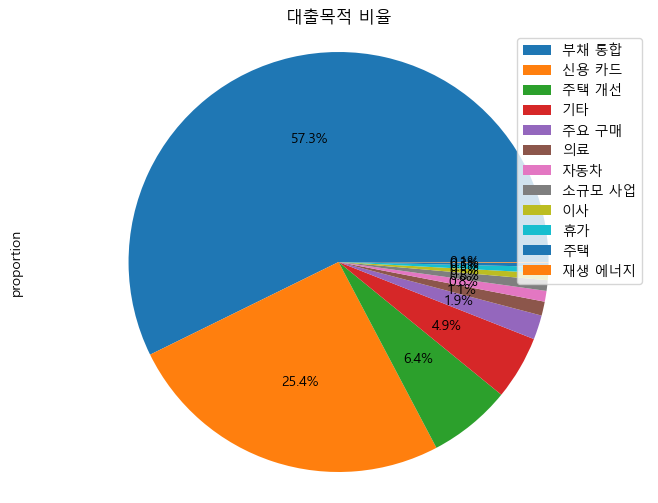

In [8]:
category_house = train_data['주택소유상태'].value_counts(normalize=True)
category_jobspend = train_data['근로기간'].value_counts(normalize=True)
category_loan_purpose = train_data['대출목적'].value_counts(normalize=True)

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 한글 폰트 파일 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 주택소유상태 카테고리 비율 시각화
plt.figure(figsize=(8, 6))
category_house.plot(kind='pie', autopct='%1.1f%%', labels=None)
plt.title('주택소유상태 비율')
plt.legend(labels=category_house.index, loc='upper right')
plt.axis('equal')
plt.show()

# 근로기간 카테고리 비율 시각화
plt.figure(figsize=(8, 6))
category_jobspend.plot(kind='pie', autopct='%1.1f%%', labels=None)
plt.title('근로기간 비율')
plt.legend(labels=category_jobspend.index, loc='upper right')
plt.axis('equal')
plt.show()

# 대출목적 카테고리 비율 시각화
plt.figure(figsize=(8, 6))
category_loan_purpose.plot(kind='pie', autopct='%1.1f%%', labels=None)
plt.title('대출목적 비율')
plt.legend(labels=category_loan_purpose.index, loc='upper right')
plt.axis('equal')
plt.show()

In [9]:
cate_data=train_data[['대출등급','주택소유상태','근로기간','대출목적','대출기간']]

In [10]:
cate_data.head()

,대출등급,주택소유상태,근로기간,대출목적,대출기간
0,C,RENT,6 years,부채 통합,36 months
1,B,MORTGAGE,10+ years,주택 개선,60 months
2,A,MORTGAGE,5 years,부채 통합,36 months
3,C,MORTGAGE,8 years,부채 통합,36 months
4,B,RENT,Unknown,주요 구매,60 months


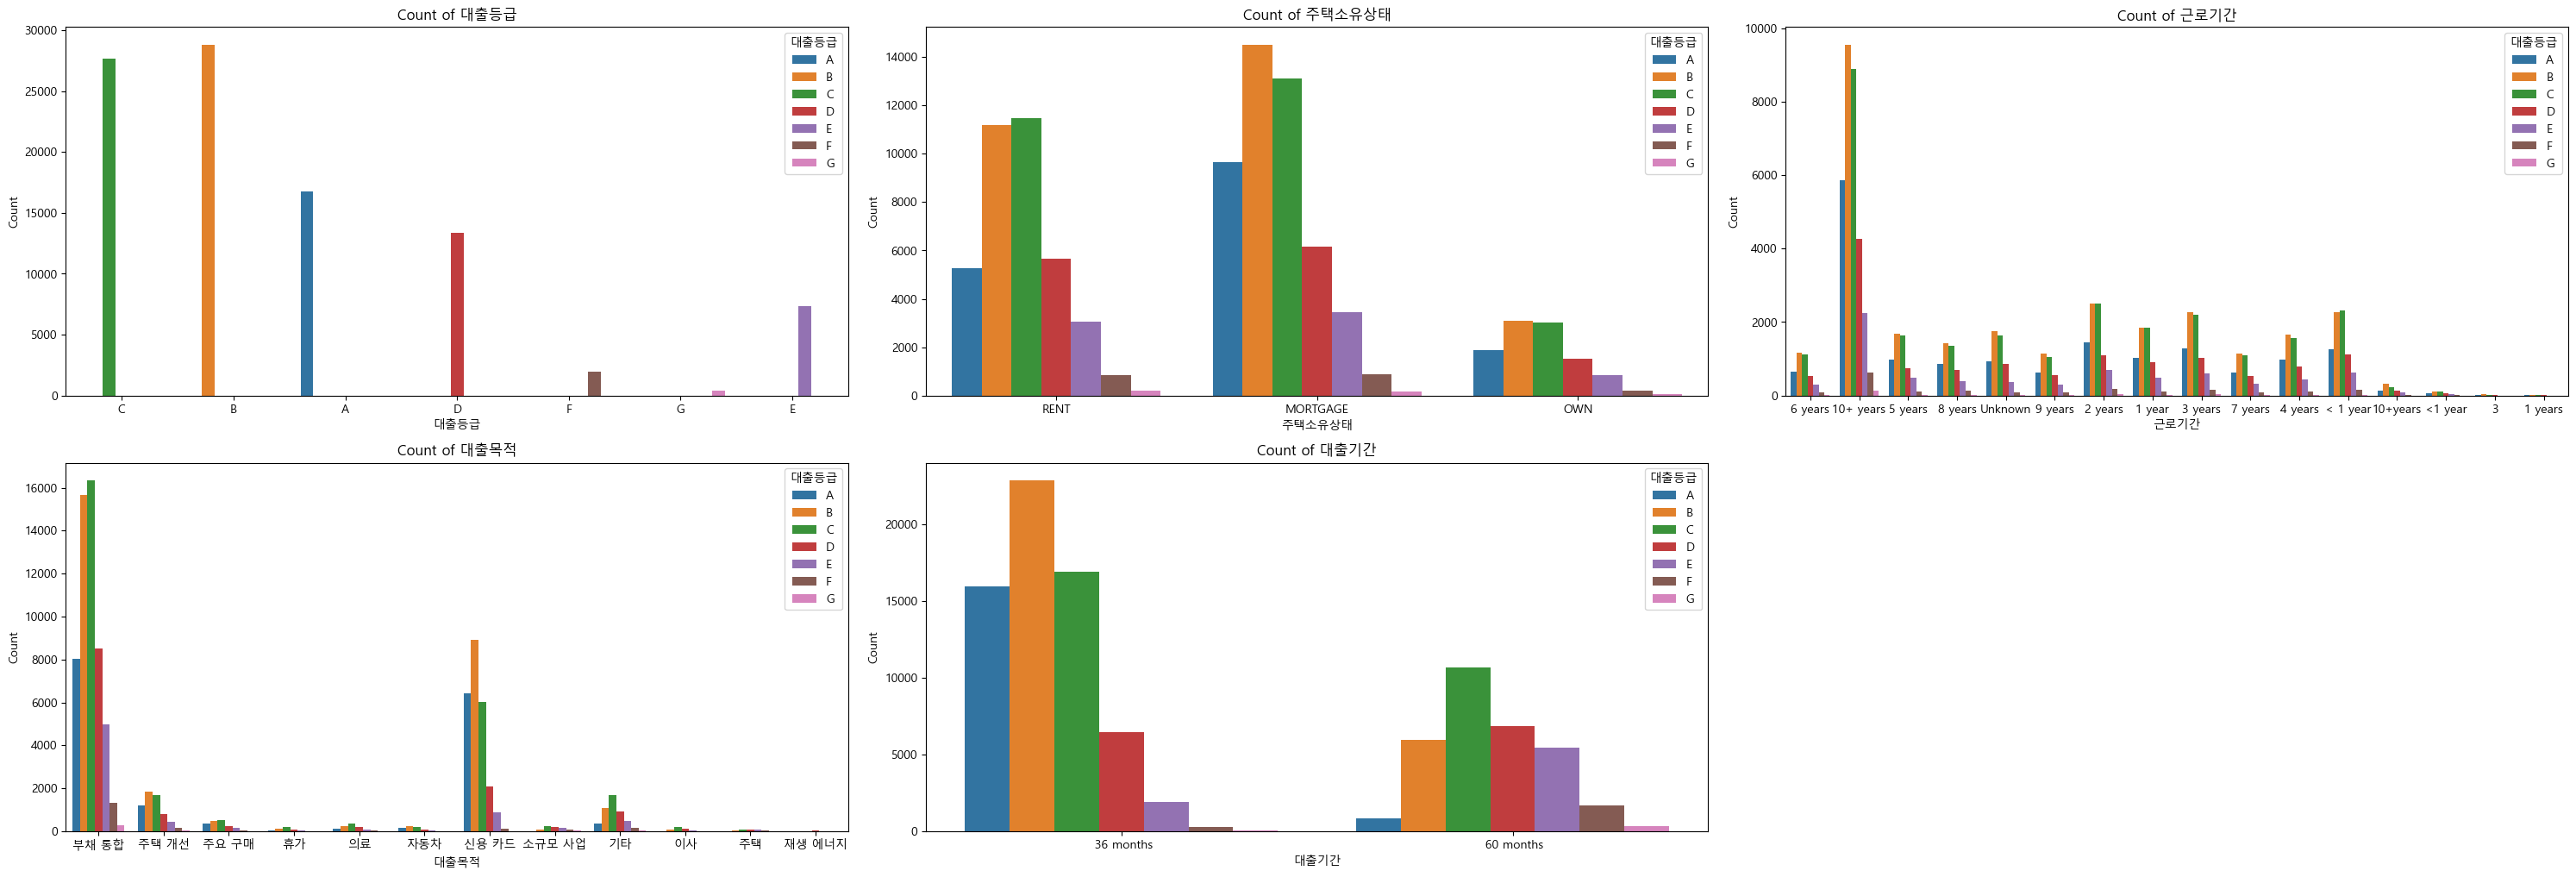

In [11]:
y_order=['A','B','C','D','E','F','G']

plt.figure(figsize=(30, 25))
for i, column in enumerate(cate_data.columns):
    plt.subplot(5, 3, i+1)
    sns.countplot(x=column, hue='대출등급', data=cate_data, hue_order=y_order)
    plt.title(f'Count of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

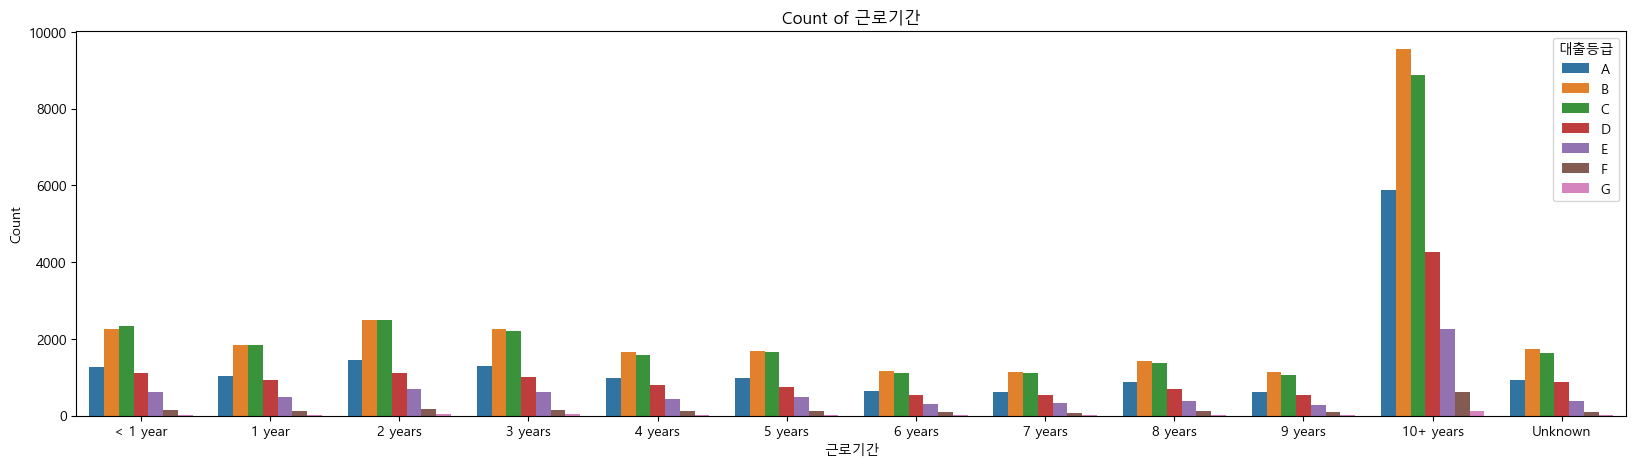

In [12]:
years_order = ['< 1 year','1 year', '2 years', '3 years', '4 years', '5 years', '6 years', 
               '7 years', '8 years', '9 years', '10+ years', 'Unknown']

plt.figure(figsize=(20,5))
sns.countplot(x='근로기간', hue='대출등급', hue_order=y_order, order=years_order, data=cate_data)
plt.title('Count of 근로기간')
plt.xlabel('근로기간')
plt.ylabel('Count')
plt.show()


# 범주형 데이터 전처리

### 근로기간은 수치형으로 간주
### 대출목적 컬럼의 경우 범주가 9개로 많기에 데이터가 고차원이 되는것을 방지하기 위해 frequency-encoding을 함.
### 주택소유상태도 범주 4개 frequency-encoding수행

### 대출기간은 2개의 범주, Labeling-encodiong

In [13]:
frequency_encoding = cate_data['대출목적'].value_counts(normalize=True)
cate_data['대출목적'] = cate_data['대출목적'].map(frequency_encoding)

C:\Users\hyungjun\AppData\Local\Temp\ipykernel_35892\3718045868.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cate_data['대출목적'] = cate_data['대출목적'].map(frequency_encoding)


In [14]:
frequency_encoding = cate_data['주택소유상태'].value_counts(normalize=True)
cate_data['주택소유상태'] = cate_data['주택소유상태'].map(frequency_encoding)

C:\Users\hyungjun\AppData\Local\Temp\ipykernel_35892\4158265077.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cate_data['주택소유상태'] = cate_data['주택소유상태'].map(frequency_encoding)


In [15]:
label_encoder = LabelEncoder()
cate_data['대출기간'] = label_encoder.fit_transform(cate_data['대출기간'])

C:\Users\hyungjun\AppData\Local\Temp\ipykernel_35892\1188622178.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cate_data['대출기간'] = label_encoder.fit_transform(cate_data['대출기간'])


In [16]:
cate_data.head()

,대출등급,주택소유상태,근로기간,대출목적,대출기간
0,C,0.391565,6 years,0.572731,0
1,B,0.497793,10+ years,0.063971,1
2,A,0.497793,5 years,0.572731,0
3,C,0.497793,8 years,0.572731,0
4,B,0.391565,Unknown,0.018724,1


In [17]:
train_data[['대출등급', '주택소유상태', '근로기간', '대출목적', '대출기간']] = cate_data[['대출등급', '주택소유상태', '근로기간', '대출목적', '대출기간']]

In [18]:
train_data.head()

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,0,6 years,0.391565,72000000,18.90,15,0.572731,0,0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,1,10+ years,0.497793,130800000,22.33,21,0.063971,0,373572,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,0,5 years,0.497793,96000000,8.60,14,0.572731,0,928644,151944.0,0.0,0.0,A
3,TRAIN_00003,14400000,0,8 years,0.497793,132000000,15.09,15,0.572731,0,325824,153108.0,0.0,0.0,C
4,TRAIN_00004,18000000,1,Unknown,0.391565,71736000,25.39,19,0.018724,0,228540,148956.0,0.0,0.0,B


# 수치형 데이터 전처리

In [19]:
train_data['근로기간'] = train_data['근로기간'].apply(lambda x: x.replace('+', ''))
train_data['근로기간'] = train_data['근로기간'].apply(lambda x: x.replace('<', ''))
train_data['근로기간'] = train_data['근로기간'].apply(lambda x: x.replace('>', ''))
train_data['근로기간'] = train_data['근로기간'].apply(lambda x: x.replace('Unknown', '0year'))
train_data['근로기간'] = train_data['근로기간'].apply(lambda x: x.replace('years', 'year'))
train_data['근로기간'] = train_data['근로기간'].apply(lambda x: int(x.split('year')[0]))

In [20]:
##수치데이터 컬럼 추출해서 데이터프레임 생성
train_data_numerical=train_data.drop(columns=['주택소유상태','대출목적','대출등급'])
train_data_numerical.head()

,ID,대출금액,대출기간,근로기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
0,TRAIN_00000,12480000,0,6,72000000,18.90,15,0,0,0.0,0.0,0.0
1,TRAIN_00001,14400000,1,10,130800000,22.33,21,0,373572,234060.0,0.0,0.0
2,TRAIN_00002,12000000,0,5,96000000,8.60,14,0,928644,151944.0,0.0,0.0
3,TRAIN_00003,14400000,0,8,132000000,15.09,15,0,325824,153108.0,0.0,0.0
4,TRAIN_00004,18000000,1,0,71736000,25.39,19,0,228540,148956.0,0.0,0.0


In [21]:
train_data_numerical.describe()

,대출금액,대출기간,근로기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
count,9.629300e+04,96293.000000,96293.000000,9.629300e+04,96293.000000,96293.000000,96293.000000,9.629300e+04,9.629300e+04,96293.000000,96293.000000
mean,1.830376e+07,0.330398,5.738506,9.392673e+07,19.379607,25.304882,0.345685,8.225120e+05,4.282327e+05,54.381149,0.005805
std,1.032887e+07,0.470359,3.768894,9.956923e+07,33.569733,12.088616,0.919123,1.027747e+06,4.402112e+05,1414.776554,0.079967
min,1.200000e+06,0.000000,0.000000,0.000000e+00,0.000000,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.020000e+07,0.000000,2.000000,5.760000e+07,12.650000,17.000000,0.000000,3.075720e+05,1.346160e+05,0.000000,0.000000
50%,1.680000e+07,0.000000,6.000000,7.800000e+07,18.740000,24.000000,0.000000,5.976960e+05,2.870160e+05,0.000000,0.000000
75%,2.400000e+07,1.000000,10.000000,1.128000e+08,25.540000,32.000000,0.000000,1.055076e+06,5.702280e+05,0.000000,0.000000
max,4.200000e+07,1.000000,10.000000,1.080000e+10,9999.000000,169.000000,30.000000,4.195594e+07,5.653416e+06,75768.000000,4.000000


### 요약통계량을 봤을때 
### 1.부채_대비_소득_비율, 2.총계좌수, 3.최근_2년간_연체_횟수, 4.총 연체횟수, 5.연체계좌(애매)에서 이상치가 검출된다.
### 부채_대비_소득_비율의 경우 소득이 0에 수렴함에따라 해당 값이 증가하는 왜곡현상이 의심된다.

In [22]:
train_data_numerical[train_data_numerical['연간소득']==0]

,ID,대출금액,대출기간,근로기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
12498,TRAIN_12498,4440000,0,0,0,9999.0,20,2,205356,85884.0,0.0,0.0


### 연간소득이 0임에 따라 부채_대비_소득_비율이 9999이 되는 이상치가 하나 존재하여 삭제함.

In [23]:
train_data=train_data[train_data['연간소득']!=0]
train_data_numerical=train_data_numerical[train_data_numerical['연간소득']!=0]

In [24]:
train_data_numerical[train_data_numerical['부채_대비_소득_비율']>100]

,ID,대출금액,대출기간,근로기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
29129,TRAIN_29129,14400000,0,0,1440000,672.52,13,0,595344,442860.0,0.0,0.0
62125,TRAIN_62125,18000000,0,0,10440000,120.66,26,0,396456,200328.0,0.0,0.0
62765,TRAIN_62765,7860000,0,0,2124000,1092.52,25,2,0,0.0,0.0,0.0
81970,TRAIN_81970,14400000,1,0,11694000,125.25,53,0,302736,412116.0,0.0,0.0
83954,TRAIN_83954,24000000,1,1,32400000,100.09,16,0,248064,339732.0,0.0,0.0


In [25]:
train_data_numerical_1=train_data_numerical.drop(columns=['ID'])
train_data_numerical_1.head()

,대출금액,대출기간,근로기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
0,12480000,0,6,72000000,18.90,15,0,0,0.0,0.0,0.0
1,14400000,1,10,130800000,22.33,21,0,373572,234060.0,0.0,0.0
2,12000000,0,5,96000000,8.60,14,0,928644,151944.0,0.0,0.0
3,14400000,0,8,132000000,15.09,15,0,325824,153108.0,0.0,0.0
4,18000000,1,0,71736000,25.39,19,0,228540,148956.0,0.0,0.0


C:\Users\hyungjun\AppData\Local\Temp\ipykernel_35892\3046744466.py:10: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


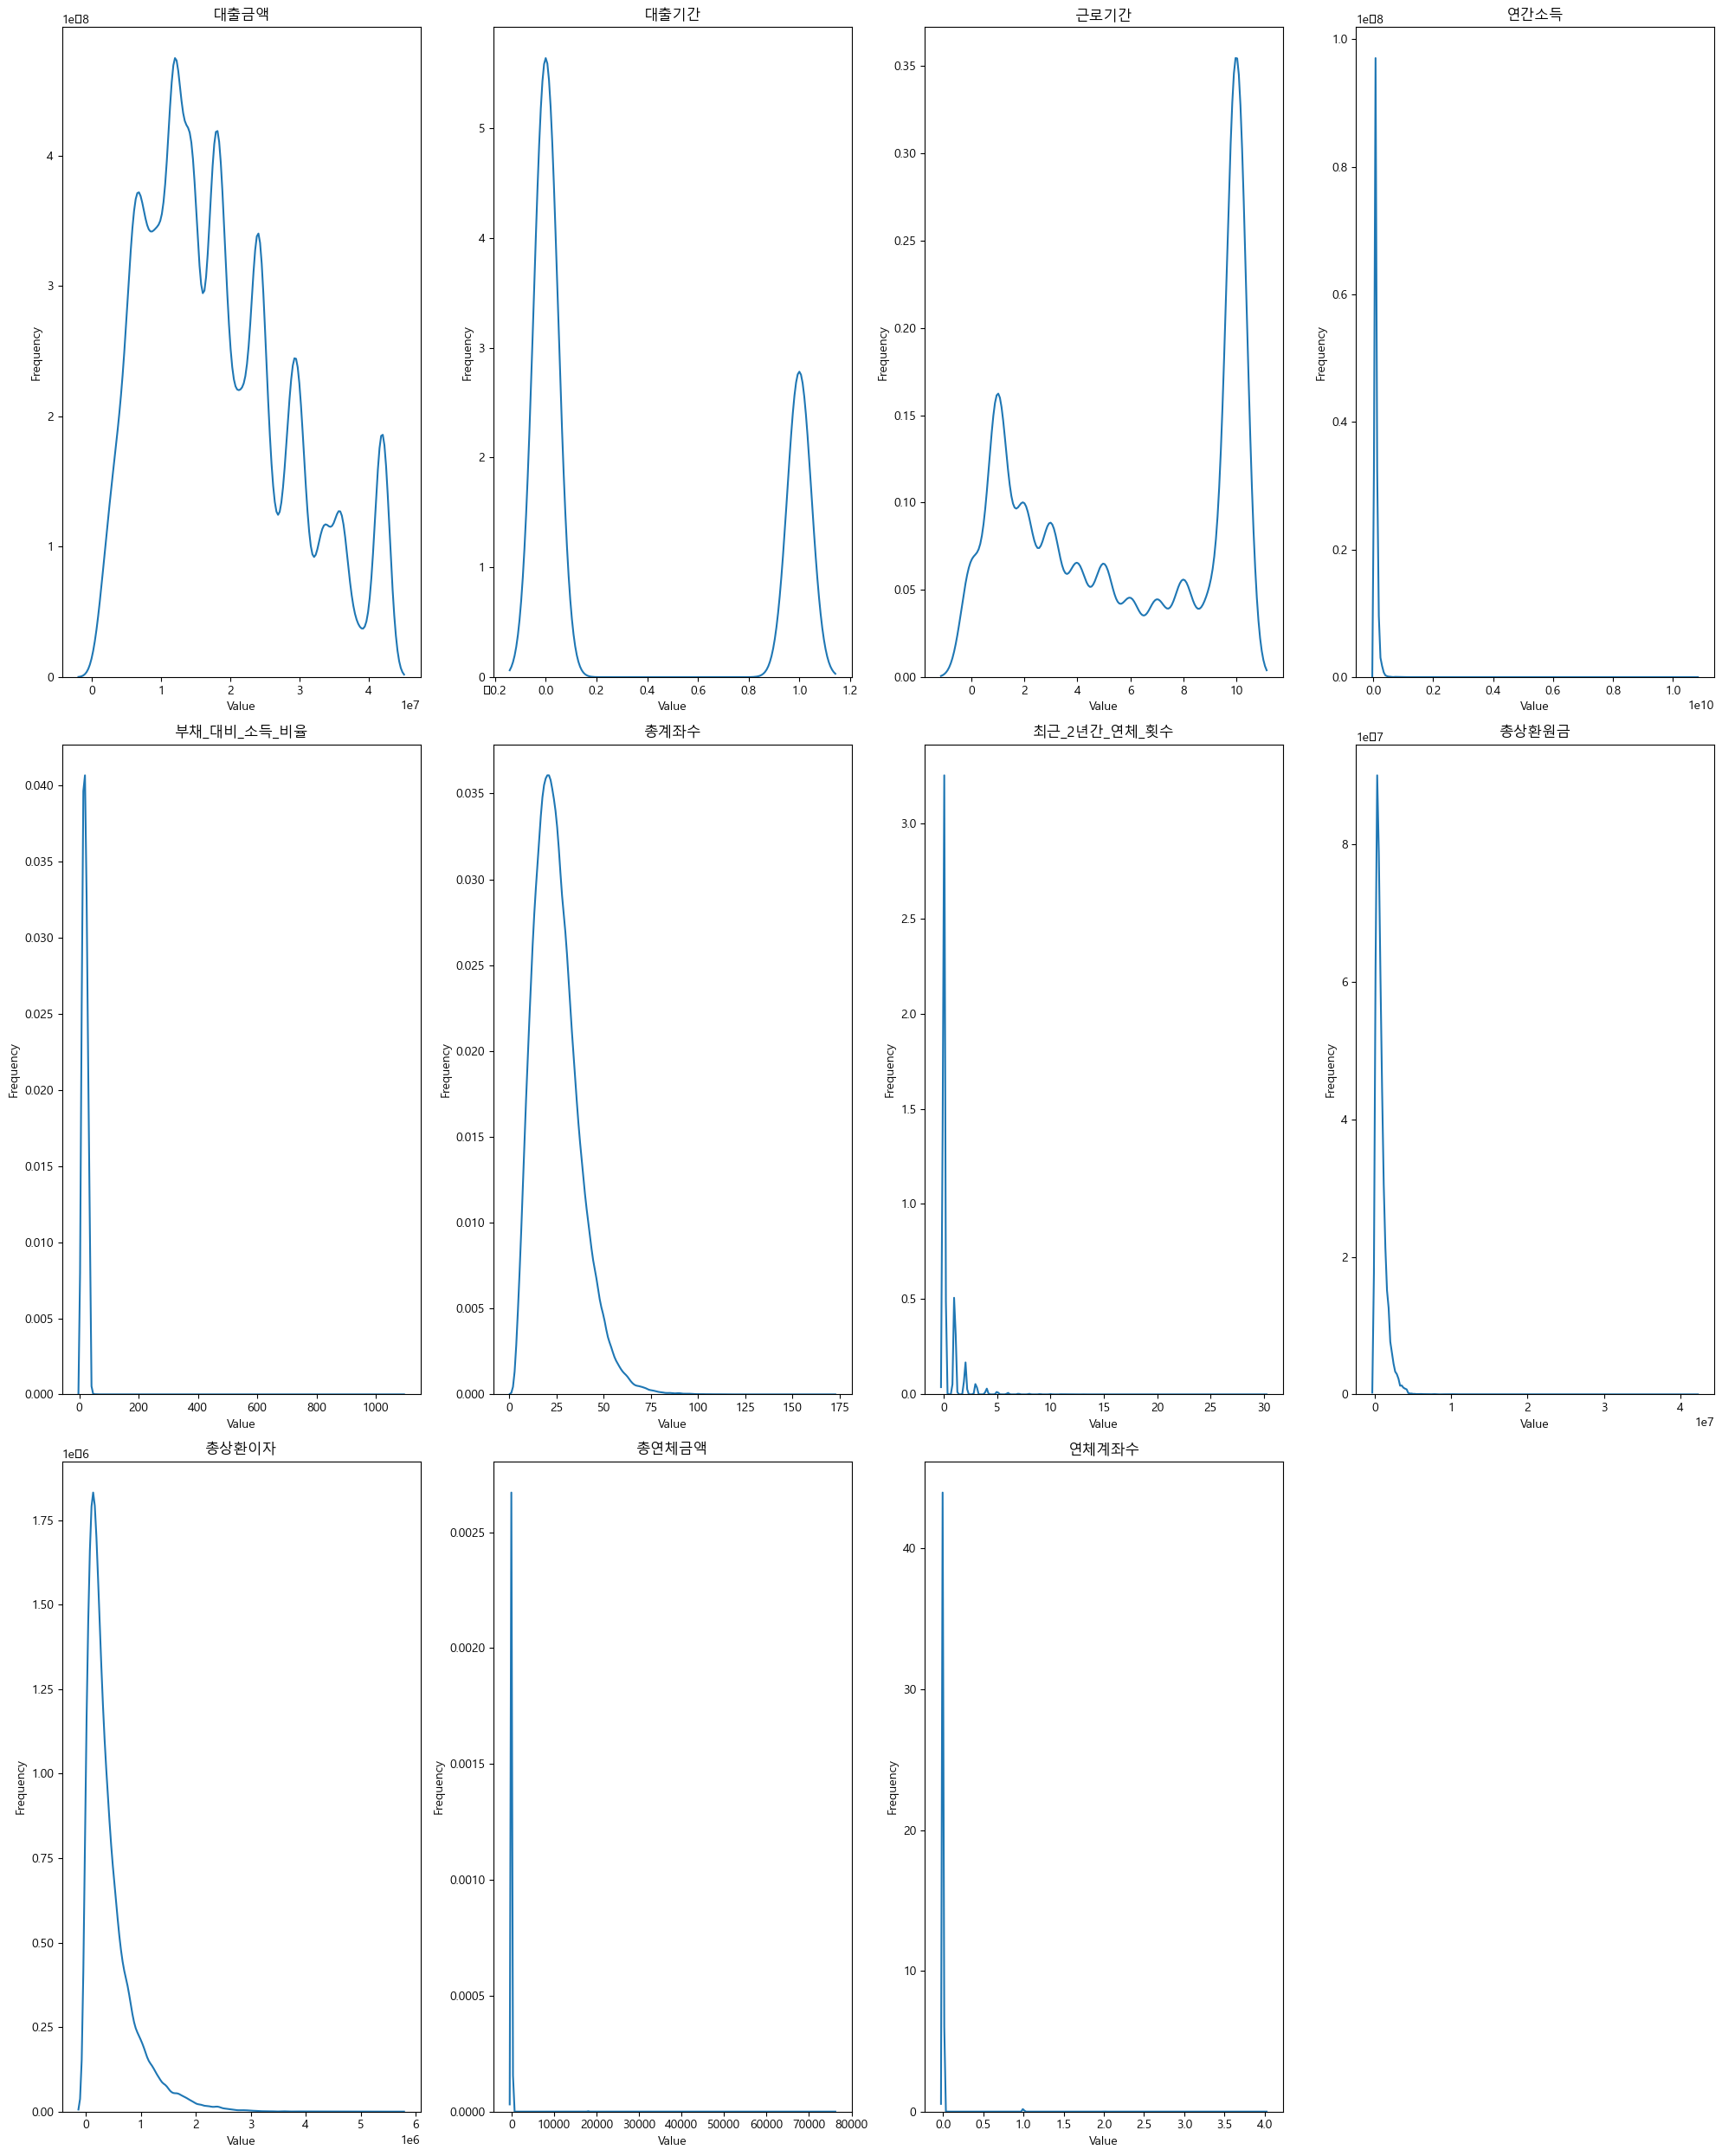

In [28]:
plt.figure(figsize=(20,25))

for i, column in enumerate(train_data_numerical_1.columns):
    plt.subplot(3, 4, i+1)
    sns.kdeplot(train_data_numerical_1[column])
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### 분포를 봤을때 이상치때문에 그래프 x값의 범위가 지나치게 커진게 보임

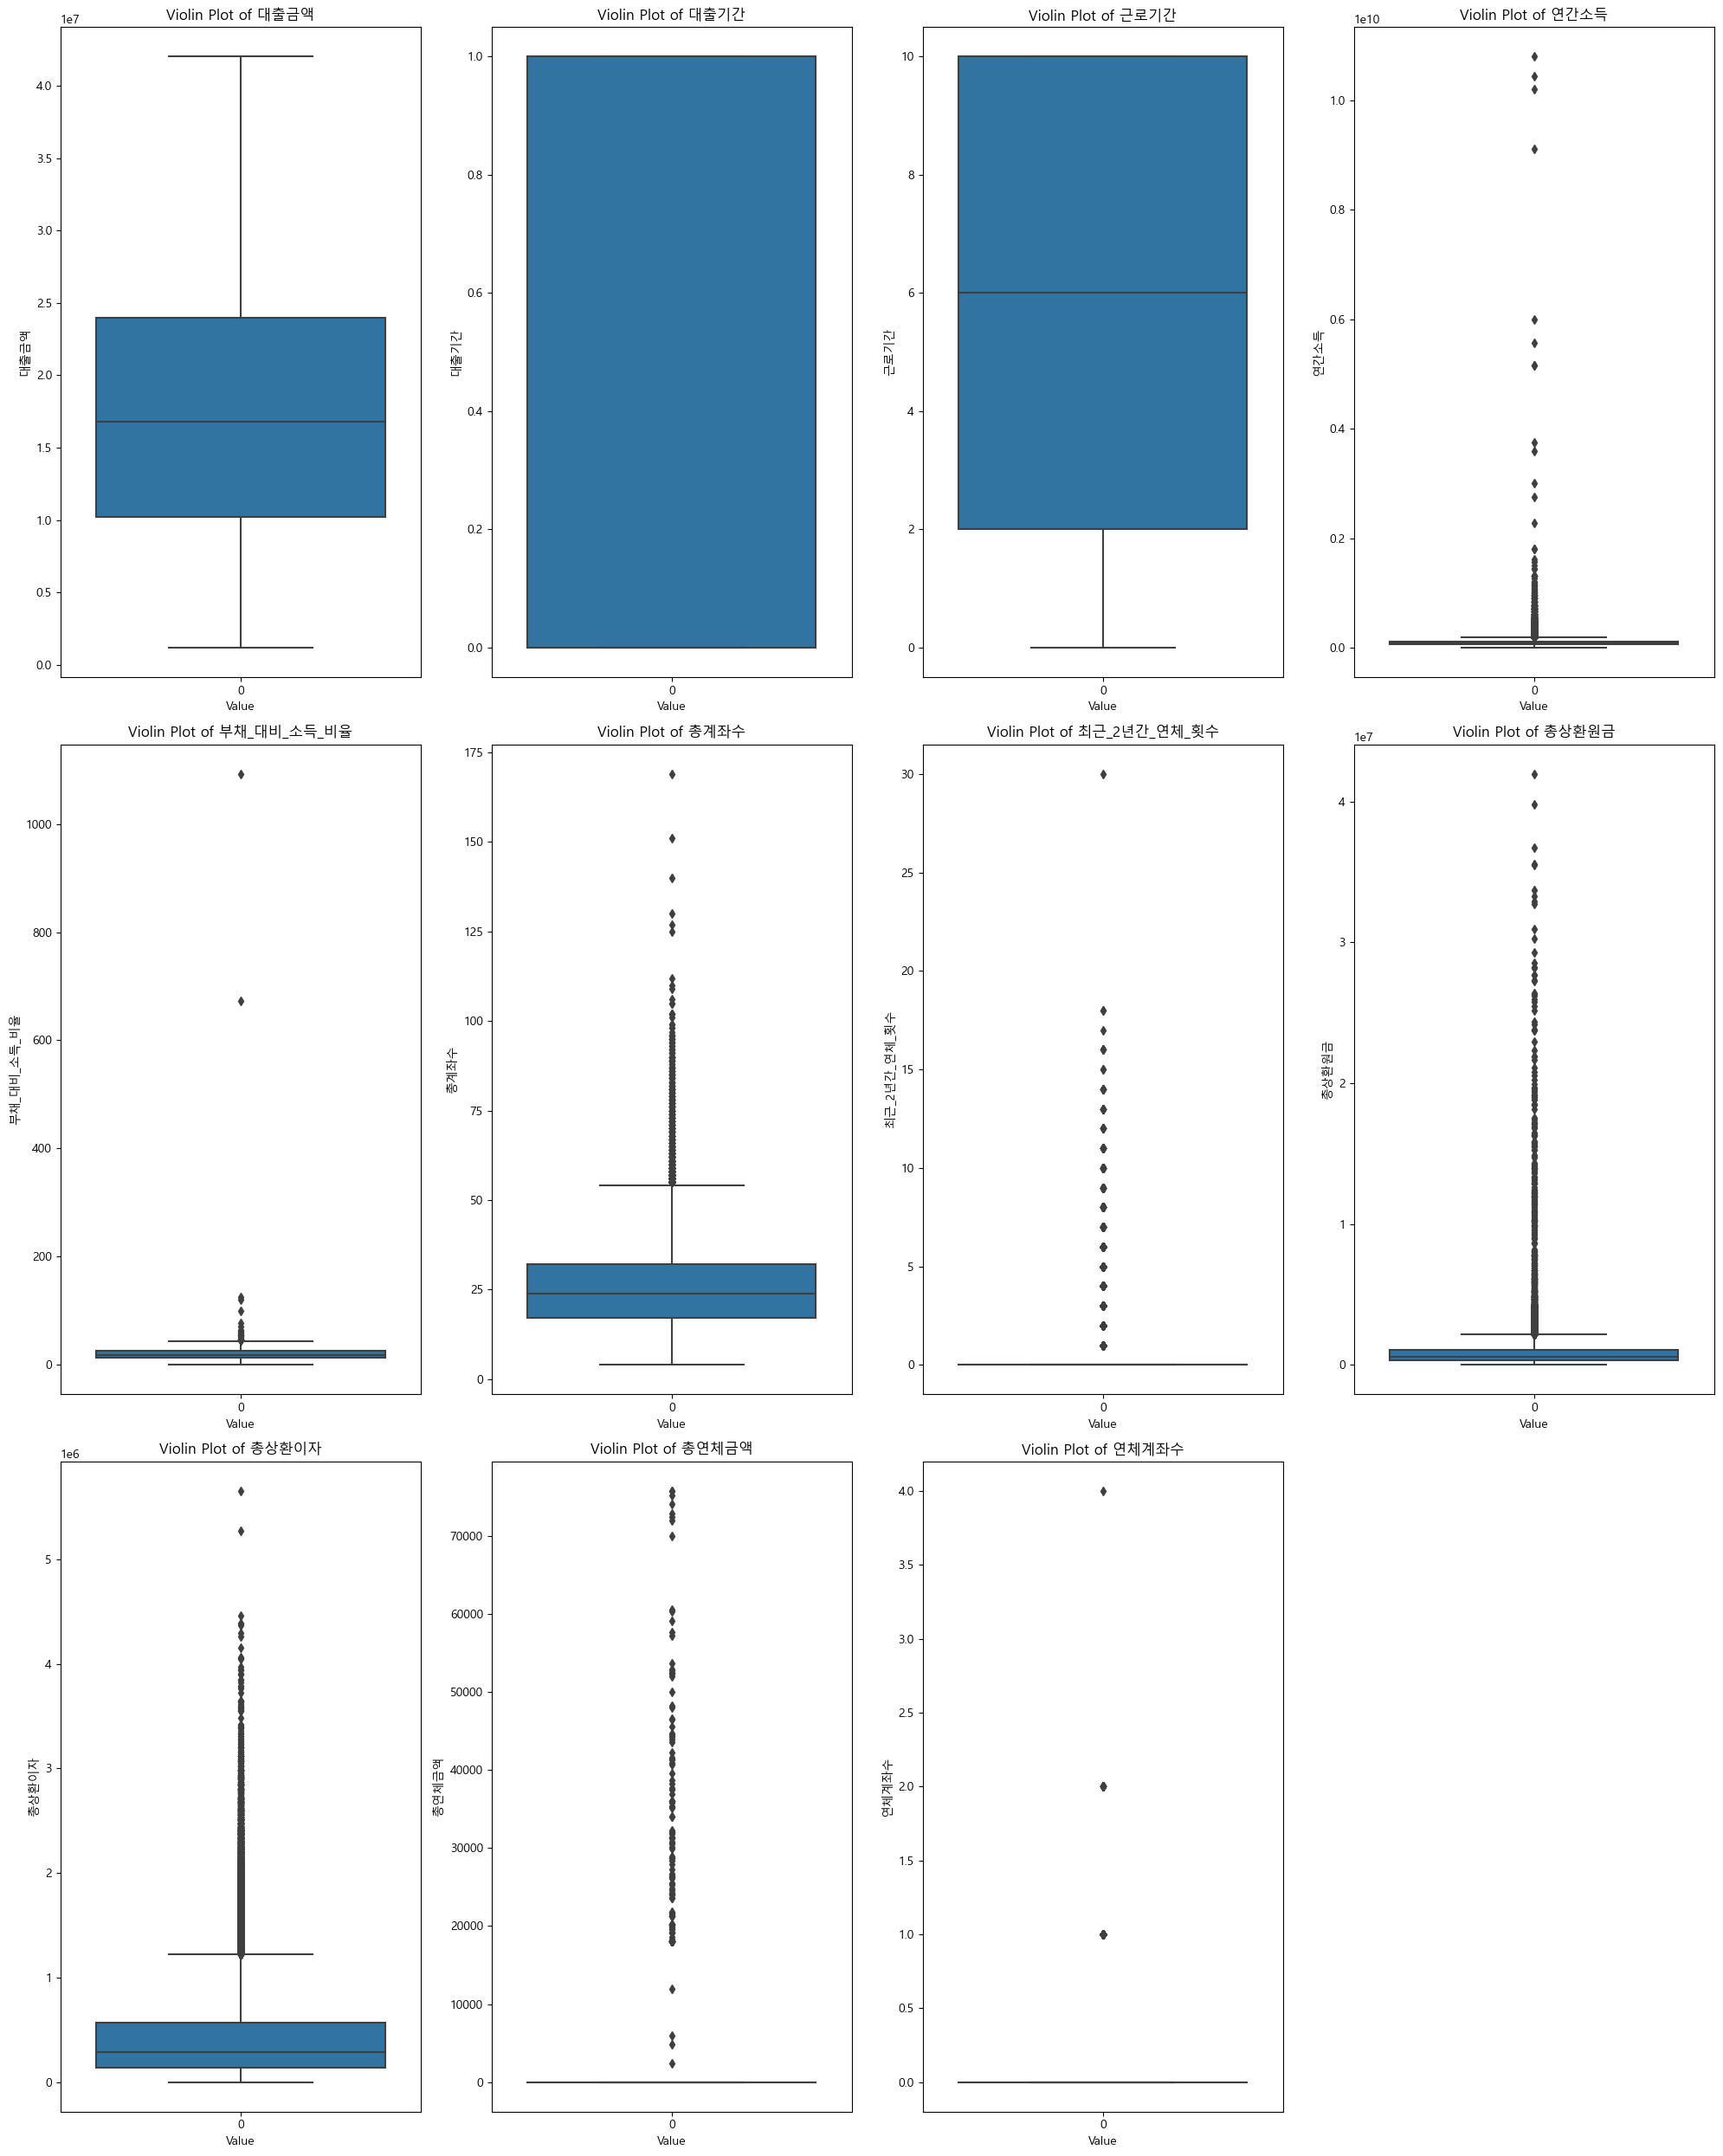

In [31]:
plt.figure(figsize=(20,25))

for i, column in enumerate(train_data_numerical_1.columns):
    plt.subplot(3, 4, i+1)
    sns.boxplot(data=train_data_numerical_1[column])
    plt.title(f'Violin Plot of {column}')
    plt.xlabel('Value')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

### 분포의 형태에 따라 로그변환을 고려할 계획

In [ ]:
train_data_numerical[train_data_numerical['최근_2년간_연체_횟수']>10].count()

In [ ]:
train_data_numerical.head()

In [ ]:
train_data.head()

## 대출금액, 대출기간,근로기간 빼고 로그변환

In [ ]:
train_data_numerical.columns

In [ ]:
columns_to_log_transform = [col for col in train_data_numerical.columns if col not in ['ID', '대출금액', '대출기간', '근로기간']]

# 로그 변환 수행
train_data_numerical[columns_to_log_transform] = train_data_numerical[columns_to_log_transform].apply(lambda x: np.log1p(x))

In [ ]:
train_data_numerical.describe()

In [ ]:
plt.figure(figsize=(20,25))

for i, column in enumerate(train_data_numerical_1.columns):
    plt.subplot(3, 4, i+1)
    sns.kdeplot(train_data_numerical_1[column])
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
train_data[['대출금액', '대출기간', '근로기간', '연간소득', '부채_대비_소득_비율', '총계좌수','최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수']]

In [ ]:
#로그변환까지 한 데이터
train_data.to_csv('데이콘_신용데이터/train_data_1', index=False)

In [ ]:
train_data

In [ ]:
train_data.count()